In [2]:
!pip install tensorflow

     |████████████████████████████████| 105.8MB 1.4MB/s eta 0:00:011   |██████████████████████████▎     | 87.0MB 1.2MB/s eta 0:00:16
     |████████████████████████████████| 102kB 194kB/s ta 0:00:011
     |████████████████████████████████| 1.4MB 1.4MB/s eta 0:00:01
     |████████████████████████████████| 51kB 5.4MB/s eta 0:00:011
     |████████████████████████████████| 3.2MB 1.3MB/s eta 0:00:01
     |████████████████████████████████| 61kB 6.0MB/s eta 0:00:011
     |████████████████████████████████| 491kB 653kB/s eta 0:00:01
     |████████████████████████████████| 2.0MB 814kB/s eta 0:00:01
     |████████████████████████████████| 51kB 9.1MB/s  eta 0:00:01
     |████████████████████████████████| 92kB 2.8MB/s eta 0:00:011
  Stored in directory: /Users/t.alibaisi/Library/Caches/pip/wheels/ee/98/38/46cbcc5a93cfea5492d19c38562691ddb23b940176c14f7b48
  Stored in directory: /Users/t.alibaisi/Library/Caches/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Stored in directo

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 3s 1us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape


(60000, 28, 28)

In [7]:
len(train_labels)


60000

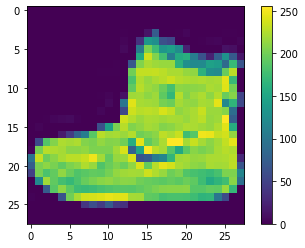

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0


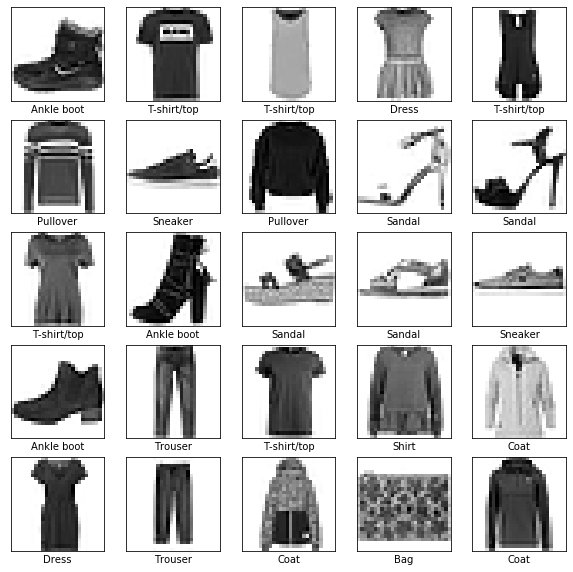

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


W0826 12:08:15.098572 4556019136 deprecation.py:506] From /Users/t.alibaisi/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.4968 - acc: 0.8252
Epoch 2/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3748 - acc: 0.8652
Epoch 3/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3377 - acc: 0.87620s - loss: 0.3376 - 
Epoch 4/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3111 - acc: 0.8855
Epoch 5/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2928 - acc: 0.8928


In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)


10000/10000 [==============================] - 0s 36us/sample - loss: 0.3485 - acc: 0.8765
Test accuracy: 0.8765


In [15]:
predictions = model.predict(test_images)


In [16]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

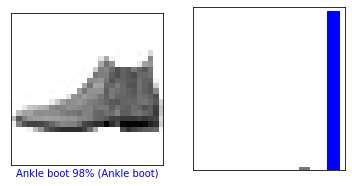

In [17]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

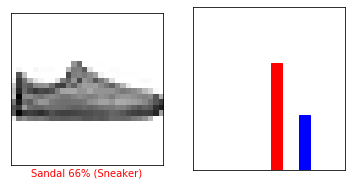

In [18]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

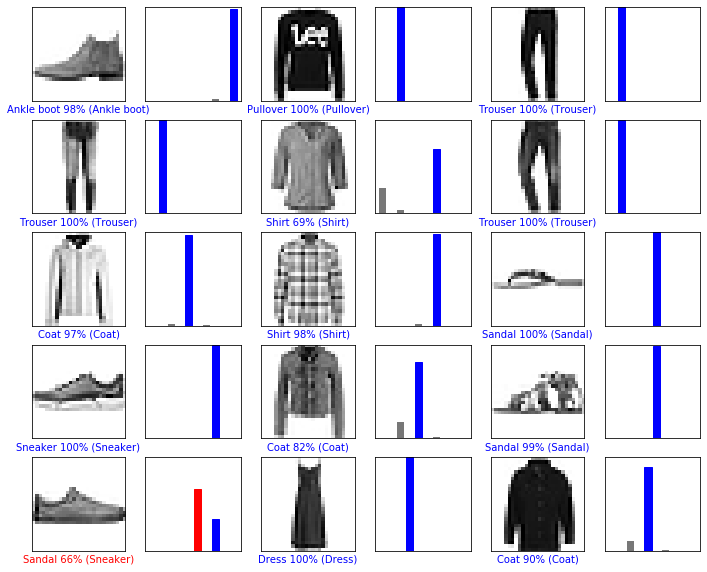

In [19]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.show()

In [20]:
# Grab an image from the test dataset
img = test_images[1]

print(img.shape)


(28, 28)


In [21]:
img = (np.expand_dims(img,0))

print(img.shape)


(1, 28, 28)


In [22]:
predictions_single = model.predict(img)

print(predictions_single)


[[1.3595663e-05 2.7125056e-11 9.9729651e-01 3.2793759e-09 2.0822436e-03
  2.4746116e-15 6.0767110e-04 2.4330492e-13 3.6807300e-08 1.1085079e-12]]


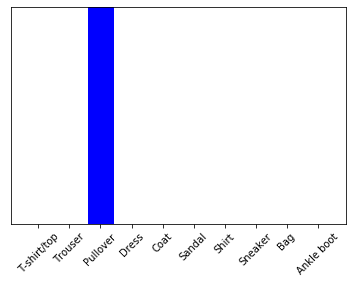

In [23]:
plot_value_array(1, predictions_single[0], test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [24]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

2
